Hello! My name is Keshav and this is my attempt at the heart failure prediction dataset.

**Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

The first step is to import all relevant libraries. I used pandas and seaborn for data visualization, numpy for data modification, and sklearn for all of the models used.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

Next, I worked on analyzing the data, paying attention to core attributes and null values

In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


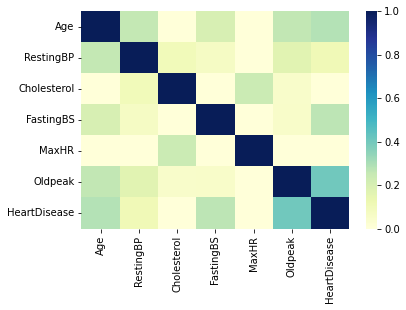

In [7]:
sns.heatmap(df.corr(), vmin=0, cmap="YlGnBu");

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

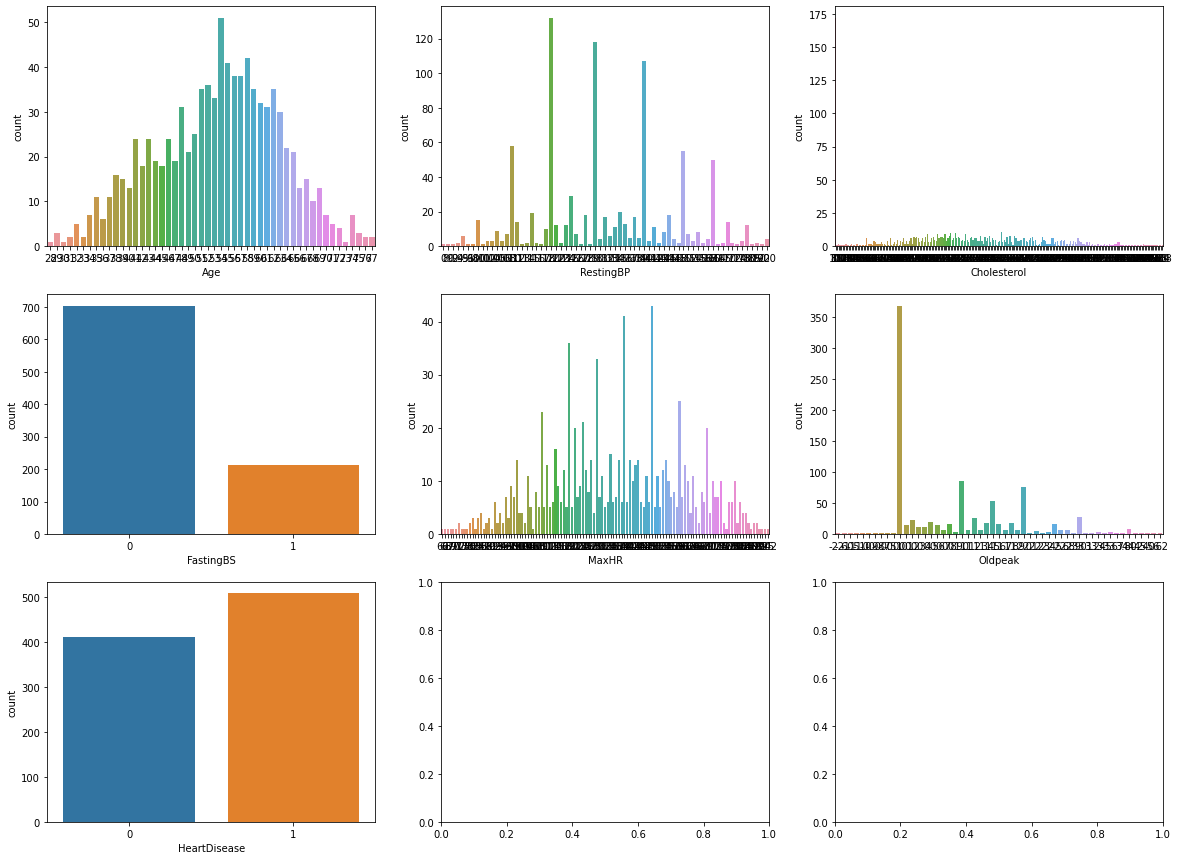

In [8]:
fig, ax =plt.subplots(3,3, figsize=(20,15))
sns.countplot(data=df, x='Age', ax=ax[0,0])
sns.countplot(data=df, x='RestingBP', ax=ax[0,1])
sns.countplot(data=df, x='Cholesterol', ax=ax[0,2])
sns.countplot(data=df, x='FastingBS', ax=ax[1,0])
sns.countplot(data=df, x='MaxHR', ax=ax[1,1])
sns.countplot(data=df, x='Oldpeak', ax=ax[1,2])
sns.countplot(data=df, x='HeartDisease', ax=ax[2,0])

**Now, we have to prepare the model:**

In [9]:
x_val = df.drop("HeartDisease",axis=1)
y_val = df["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

# encode the non-numerical data
label = LabelEncoder()
encoder = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
        'ST_Slope']
for i in encoder:
    x_train[i] = label.fit_transform(x_train[i])
    x_test[i] = label.transform(x_test[i])

**Creating the models (without parameters which will be done later)**

In [10]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()

**Now, I use hypertuning to find the best set of parameters for each model**

In [11]:
# set of model params
model_params = {
    'LR': {
        'max_iter': [800, 900, 1000],
        'C': [1.0, 10.0],
        'penalty': ['l1', 'l2', 'elasticnet', 'none']
    },
    'DT':{
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'splitter' : ['best', 'random']
    },
    'RF': {
        'max_features': ['log2', 'sqrt'],
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    'GNB':{
        'var_smoothing': np.logspace(0,-9, num=100)
    }
}

**Now, I can hypertune each model**

In [12]:
def hypTune(model, param):
    scorer = metrics.make_scorer(metrics.roc_auc_score, needs_proba=True)
    new_mod = GridSearchCV(model, param_grid=param, scoring=scorer,
                         n_jobs=-1, cv=5, verbose=1)
    return new_mod

In [13]:
# random forest
rf_csv = hypTune(rf, model_params["RF"])
rf_csv.fit(x_train, y_train)
print(f'RF Best params: {rf_csv.best_params_}')
print(f'RF Best score: {rf_csv.best_score_}')

rf = rf_csv.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RF Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 400}
RF Best score: 0.922363790271697


In [14]:
# logistic regression
lr_csv = hypTune(lr, model_params["LR"])
lr_csv.fit(x_train, y_train)
print(f'LR Best params: {lr_csv.best_params_}')
print(f'LR Best score: {lr_csv.best_score_}')

lr = lr_csv.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
LR Best params: {'C': 1.0, 'max_iter': 800, 'penalty': 'l2'}
LR Best score: 0.9054824054406827


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

^ errors were because of certain parameters being incompatible with others (ie. solver lbfgs and l1 penalty)

In [15]:
# decision tree
dt_csv = hypTune(dt, model_params["DT"])
dt_csv.fit(x_train, y_train)
print(f'DT Best params: {dt_csv.best_params_}')
print(f'DT Best score: {dt_csv.best_score_}')

dt = dt_csv.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
DT Best params: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
DT Best score: 0.8956087955938947


In [16]:
# Gaussian NB
gnb_csv = hypTune(gnb, model_params["GNB"])
gnb_csv.fit(x_train, y_train)
print(f'GNB Best params: {gnb_csv.best_params_}')
print(f'GNB Best score: {gnb_csv.best_score_}')

gnb = gnb_csv.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GNB Best params: {'var_smoothing': 4.3287612810830526e-07}
GNB Best score: 0.9123835137100776


**Finally, comparing the scores of each model**

**Creating a method to calculate the score of each model:**

In [17]:
def getProb(inputVal):
    if(inputVal == "DecisionTree"):
        modelName = dt
    elif(inputVal == "LogisticRegression"):
        modelName = lr
    elif(inputVal == "RandomForest"):
        modelName = rf
    elif(inputVal == "GaussianNB"):
        modelName = gnb
        
    # calculating the predict probability
    pred_test = modelName.predict_proba(x_test)[:, 1]
    pred_train = modelName.predict_proba(x_train)[:, 1]

    # calculate AUC of model
    test_auc = metrics.roc_auc_score(y_test, pred_test)
    train_auc = metrics.roc_auc_score(y_train, pred_train)

    # print results 
    print("\n")
    results = {modelName: {'test': test_auc, 'train': train_auc}}
    print(results)
    print(f'Confusion matrix: {confusion_matrix(y_test, modelName.predict(x_test))}')
    print("\n")
    

In [18]:
getProb("LogisticRegression")
getProb("DecisionTree")
getProb("RandomForest")
getProb("GaussianNB")



{LogisticRegression(max_iter=800): {'test': 0.9277003484320557, 'train': 0.9134150148275324}}
Confusion matrix: [[100  12]
 [ 26 138]]




{DecisionTreeClassifier(max_depth=3, splitter='random'): {'test': 0.8994174651567944, 'train': 0.9009189168097393}}
Confusion matrix: [[ 96  16]
 [ 30 134]]




{RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=400): {'test': 0.9409843205574914, 'train': 0.9504350710160762}}
Confusion matrix: [[ 98  14]
 [ 16 148]]




{GaussianNB(var_smoothing=4.3287612810830526e-07): {'test': 0.9331990418118468, 'train': 0.9117371624785391}}
Confusion matrix: [[ 99  13]
 [ 21 143]]




**Ending thoughts**: most of the classifiers worked well but there was some leakage in classifiers such as logistic regression where the test set performed better than the train set, as well as the gaussian nb. Best one based on this notebook is definitely random forest!